In [4]:
# importing required libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import StandardScaler


# To display maximum columns of dataframe on screen
pd.pandas.set_option('display.max_columns', None)

### 1.0 Importing dataset after filling missing values and encoding categorical variables

In [2]:
dataset=pd.read_csv('Travel_missing_filled_encoded.csv')
dataset.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TypeofContact_Self Enquiry,TypeofContact_Company Invited,TypeofContact_Rare,Occupation_Salaried,Occupation_Small Business,Occupation_Large Business,Occupation_Rare,Gender_Male,Gender_Female,Gender_Rare,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_Standard,ProductPitched_Super Deluxe,ProductPitched_Rare,MaritalStatus_Married,MaritalStatus_Divorced,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_AVP,Designation_Rare
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,200002,1,37.0,Self Enquiry,1,8.0,Rare,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [14]:
numerical_columns=['Age', 'DurationOfPitch', 'NumberOfPersonVisiting','NumberOfFollowups',
                   'PreferredPropertyStar','NumberOfTrips', 'PitchSatisfactionScore', 'MonthlyIncome']

data_num=dataset[numerical_columns]
data_num.head()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,MonthlyIncome
0,41.0,6.0,3,3.0,3.0,1.0,2,20993.0
1,49.0,14.0,3,4.0,4.0,2.0,3,20130.0
2,37.0,8.0,3,4.0,3.0,7.0,3,17090.0
3,33.0,9.0,2,3.0,3.0,2.0,5,17909.0
4,36.0,8.0,2,3.0,4.0,1.0,5,18468.0


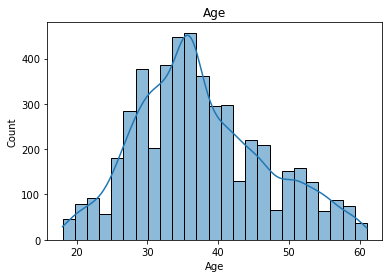

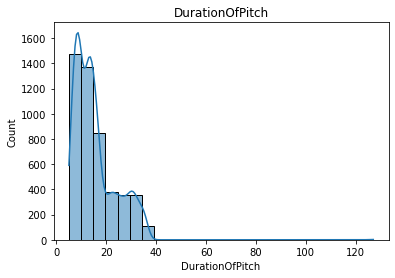

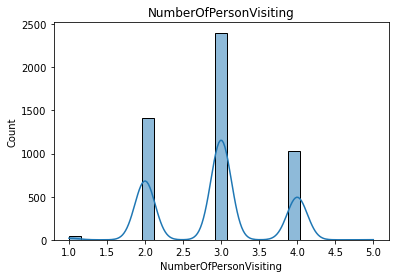

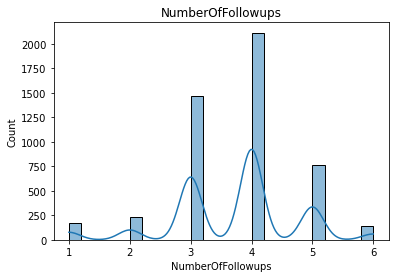

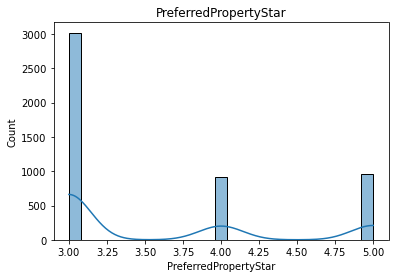

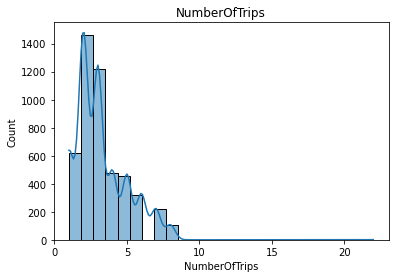

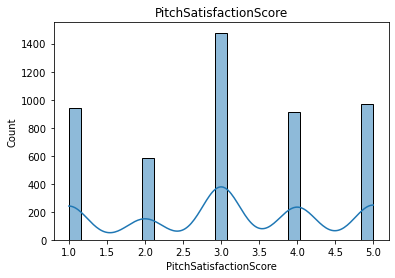

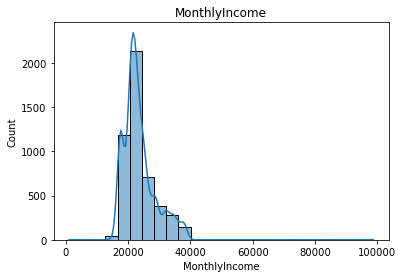

In [15]:
for feature in numerical_columns:
    sns.histplot(data=dataset[feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show();

### 2.0 Scaling

### 2.1 Standardizing the features
1. Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation. The result of the preceding transformation is called the z-score and represents how many standard deviations a given observation deviates from the mean. 

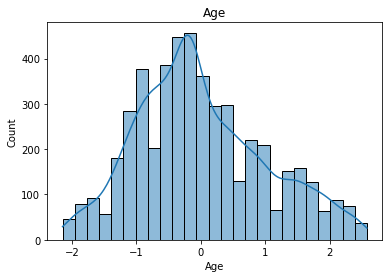

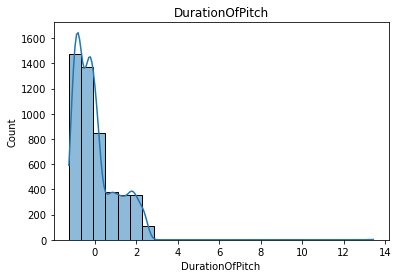

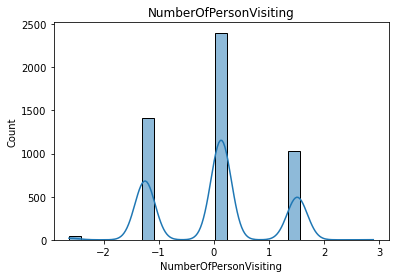

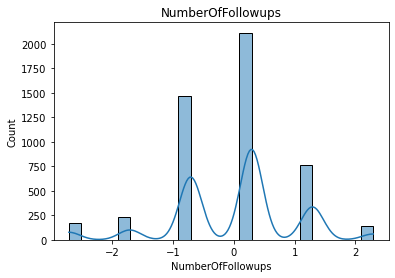

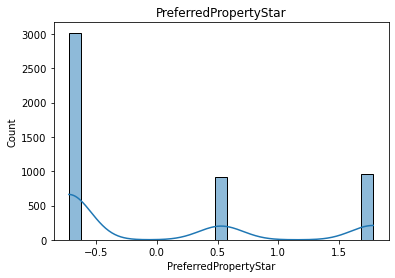

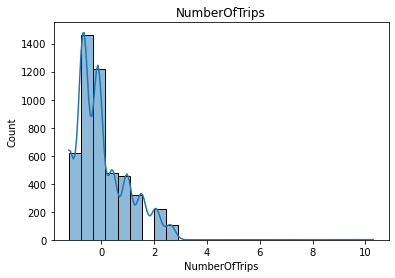

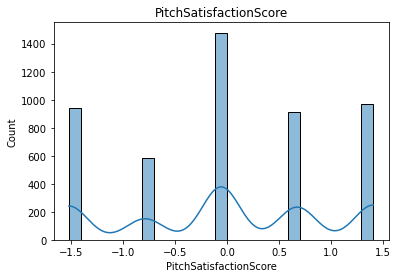

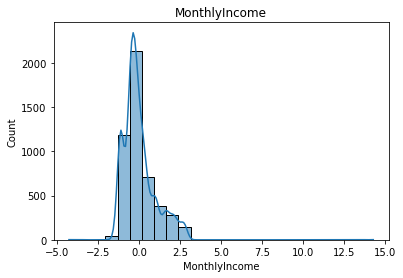

In [17]:
data1 = data_num.copy()
df_standard = (data1 - data1.mean())/data1.std()


for feature in numerical_columns:
    sns.histplot(data=df_standard[feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show();
    

### 2.2 Mean Normalization
1. In mean normalization, we center the variable at zero and rescale the distribution to the value range. This procedure involves subtracting the mean from each observation and then dividing the result by the difference between the minimum and maximum values. This transformation results in a distribution centered at 0, with its minimum and maximum values within the range of -1 to 1.

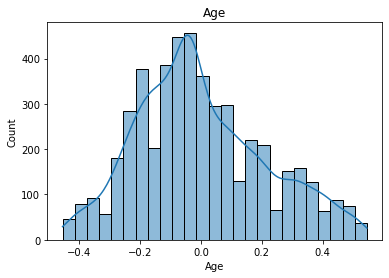

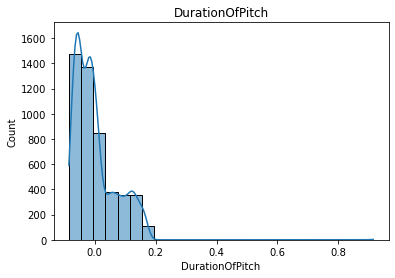

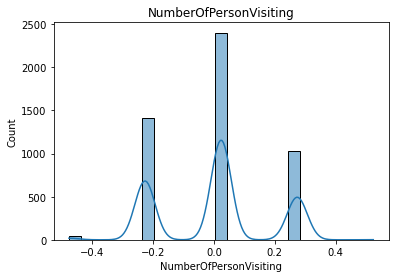

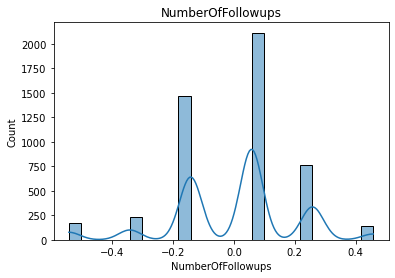

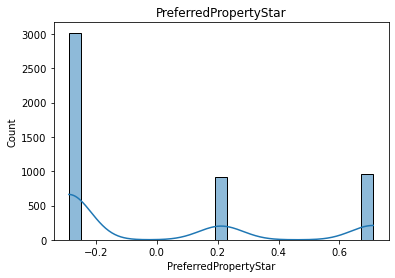

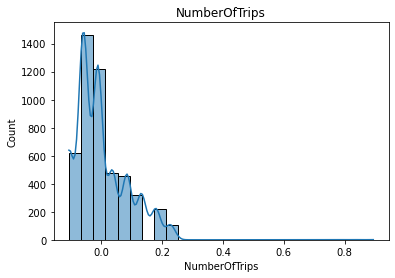

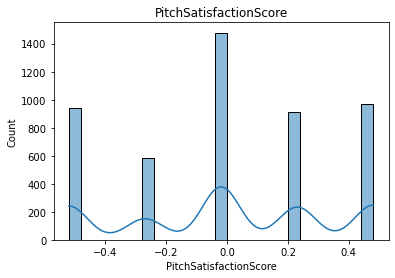

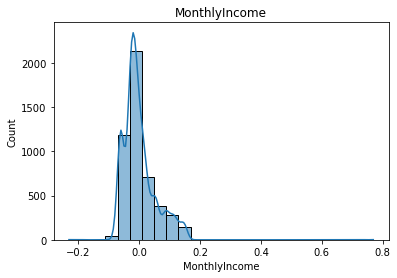

In [19]:
data1 = data_num.copy()
df_normal = (data1 - data1.mean())/(data1.max()- data1.min())


for feature in numerical_columns:
    sns.histplot(data=df_normal[feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show();
    

### 2.3 MinMax Scaler
1. Scaling to the minimum and maximum values squeezes the values of the variables between 0 and 1. To implement this scaling technique, we need to subtract the minimum value from all the observations and divide the result by the value range, that is, the difference between the maximum and minimum values

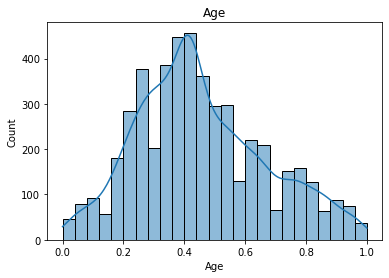

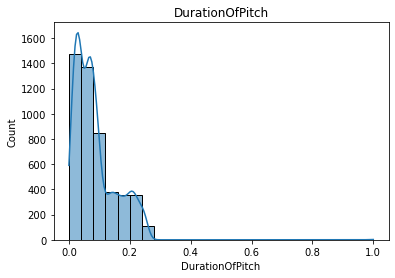

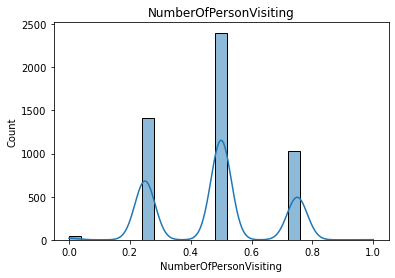

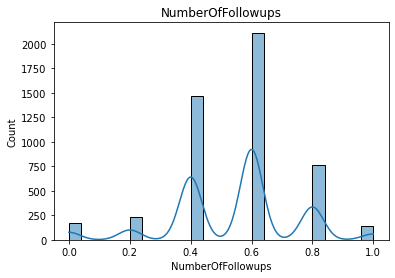

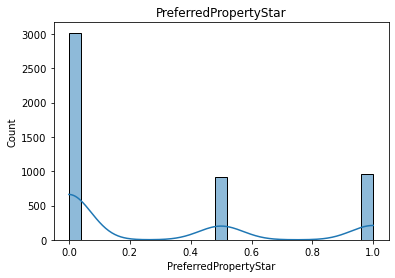

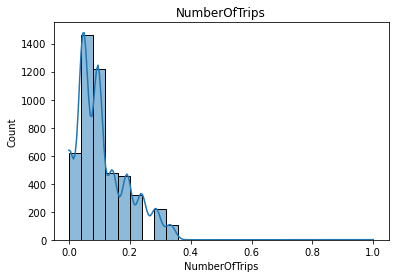

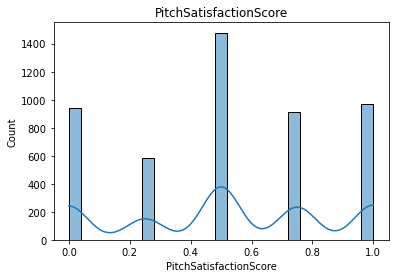

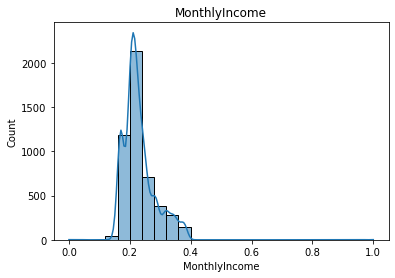

In [20]:
data1 = data_num.copy()
df_minmax = (data1 - data1.min())/(data1.max()- data1.min())


for feature in numerical_columns:
    sns.histplot(data=df_minmax[feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show();
    

### 2.4 Maximum absolute scaling
1. Maximum absolute scaling scales the data to its maximum value; that is, it divides every observation by the maximum value of the variable. 

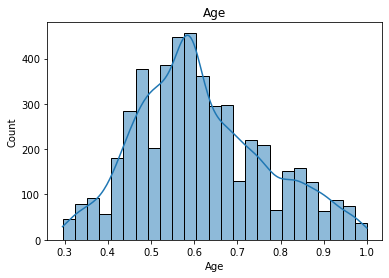

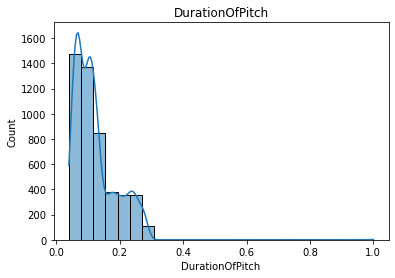

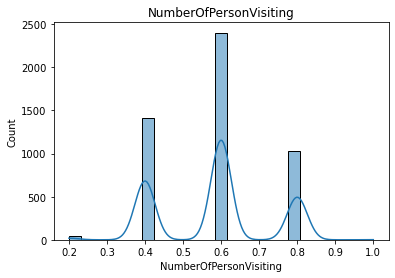

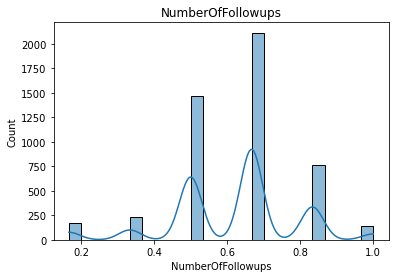

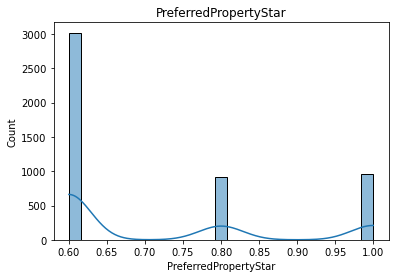

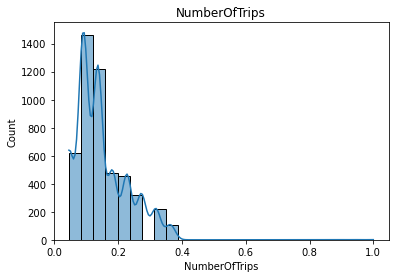

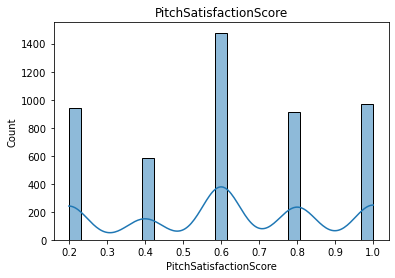

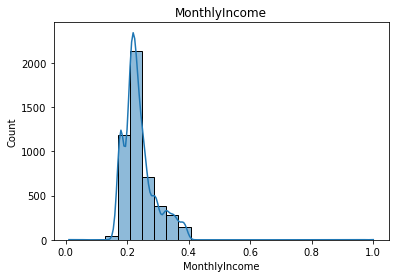

In [22]:
data1 = data_num.copy()
df_absmax = data1 /(data1.max())


for feature in numerical_columns:
    sns.histplot(data=df_absmax[feature], kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('{}'.format(feature))
    plt.show();
    